# Loan Prediction Challenge: Feature Selection

In this notebook we will select features to use from the `feature_matrix.csv` file before training and testing models.

We will use the `feature_selector` script created by [Will Koehrsen](https://github.com/WillKoehrsen).

In [1]:
# Header
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
# Imports
import pandas as pd

from feature_selector import FeatureSelector

In [3]:
# Reading in the data
fmat = pd.read_csv('../data/feature_matrix.csv')

In [4]:
# Dropping missing value labels
fmat.dropna(subset=['good_bad_flag'], inplace=True)

# Formatting
fmat_labels = fmat['good_bad_flag']
fmat = fmat.drop(columns=['good_bad_flag'])

## Create the Instance

In [5]:
fs = FeatureSelector(data=fmat, labels=fmat_labels)

## Implement

We will identify and remove:
>1. features with a significant amount of missing values
>2. features that contain a single unique value
>3. highly correlated features
>4. zero importance features
>5. low importance features

In [6]:
# Parameters
selection_params = {'missing_threshold': .6,
                    'correlation_threshold': .99,
                    'task': 'classification',
                    'eval_metric': 'auc',
                    'cumulative_importance': .99}

# Identify
fs.identify_all(selection_params=selection_params)

# Remove
new_feature_matrix = fs.remove(methods='all', keep_one_hot=True)

4 features with greater than 0.60 missing values.

7 features with a single unique value.

44 features with a correlation magnitude greater than 0.99.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.627875	valid_0's binary_logloss: 0.495024
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[16]	valid_0's auc: 0.620544	valid_0's binary_logloss: 0.500122
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[88]	valid_0's auc: 0.640997	valid_0's binary_logloss: 0.491884
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[25]	valid_0's auc: 0.652703	valid_0's binary_logloss: 0.503126
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[56]	valid_0's auc: 0.616321	valid_0's binary_logloss: 0.523008
Trai

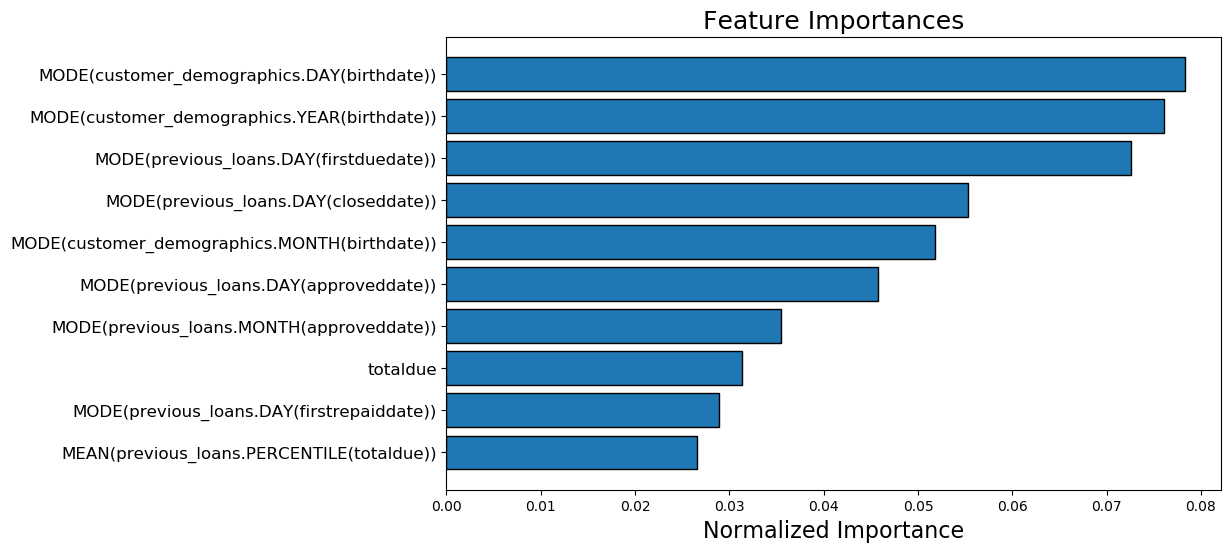

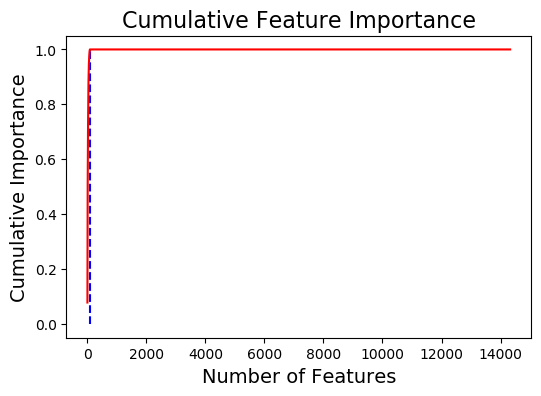

72 features required for 0.99 of cumulative importance


In [10]:
fs.plot_feature_importances(threshold=.99, plot_n=10)

In [11]:
# Save
new_feature_matrix.to_csv('../data/new_feature_matrix.csv', index=False)

## References

- Will Koehrsen's GitHub repo can be found [here](https://github.com/WillKoehrsen)